# [Peer-graded Assignment: Capstone Project - Car accident severity (Week 1)](https://www.coursera.org/learn/applied-data-science-capstone/peer/Iv5VX/capstone-project-car-accident-severity-week-1/review/UuYu6x6GEeu7chIIFoHtew)

by [Kunal Das](https://www.coursera.org/user/f80c74521e1c6f49c000e4804f44f641)

Last November 04, 2020



# 0 INTRODUCTION

### Motivation

The economic and societal impact of traffic accidents cost U.S. citizens hundreds of billions of dollars every year. And a large part of losses is caused by a small number of serious accidents. Reducing traffic accidents, especially serious accidents, is nevertheless always an important challenge. The proactive approach, one of the two main approaches for dealing with traffic safety problems, focuses on preventing potential unsafe road conditions from occurring in the first place. For the effective implementation of this approach, accident prediction and severity prediciton are critical.
If we can identify the patterns of how these serious accidents happen and the key factors, we might be able to implement well-informed actions and better allocate financial and human resources. 

### Objectives

The first objective of this project is to recognize **key factors affecting the accident severity**. The second one is to develop a model that can **accurately predict accident severity**. To be specific, for a given accident, without any detailed information about itself, like driver attributes or vehicle type, this model is supposed to be able to predict the likelihood of this accident being a severe one. The accident could be the one that just happened and still lack of detailed information, or a potential one predicted by other models. Therefore, with the sophisticated real-time traffic accident prediction solution developed by the creators of the same dataset used in this project, this model might be able to further predict severe accidents in real-time.

### Process

Data cleaning was first performed to detect and handle corrupt or missing records. EDA (Exploratory Data Analysis) and feature engineering were then done over most features. Finally, Logistic regression, Decision Tree Classifier, and Random Forest Classifier were used to develop the predictive model. The final model achieved **98.0% test accuracy** on resampled data.  

It is worth noting that the severity in this project is "**an indication of the effect the accident has on traffic**", rather than the injury severity that has already been thoroughly studied by many articles. Another thing is that the final model is dependent on only **a small range of data attributes** that are **easily achievable** for all regions in the United States and before the accident really happened. 

### Key Findings
* Country-wide accident severity can be accurately predicted with limited data attributes (location, time, weather, and POI).
* Spatial patterns are the most useful features. For small areas like **street** and **zipcode**, severe accidents are more likely to happen at places having more accidents while for larger areas like **city** and **airport region**, at places having less accident.
* Time series features are also very important, especially **minute** in a day. An accident is more likely to be a serious one when accidents happen less frequently at this time. 
* If an accident happens on **Interstate Highway**, there is a 2% chance that it will be a serious one, which is about 2.3 times of average and higher than any other street type. 
* An accident is much less likely to be severe if it happens near **traffic signal** while more likely if near **junction**.
* Weather features like **pressure**, **temperature**, **humidity**, and **wind speed** are also very important.

### Dataset Overview

US-Accident dataset is a countrywide car accident dataset, which covers **49 states of the United States**. It contains **3.5 million cases** of traffic accidents that took place from **February 2016 to June 2020**. In this project, however, only the data of accidents that happened after **February 2019** and were reported by *MapQuest* was finally used in exploration analysis and modeling so that irrelevant factors can be eliminated to the greatest extent.

Link for kaggle dataset: https://www.kaggle.com/sobhanmoosavi/us-accidents

### Acknowledgements

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “<a href="https://arxiv.org/abs/1906.05409">A Countrywide Traffic Accident Dataset.</a>”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "<a href="https://arxiv.org/abs/1909.09638">Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.</a>" In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

### Refrences

I found these notebooks really helpful:

<a href="https://towardsdatascience.com/usa-accidents-data-analysis-d130843cde02">USA Accidents Data Analysis</a>

https://www.kaggle.com/sobhanmoosavi/us-accidents/discussion/113055

<a href="https://www.kaggle.com/deepakdeepu8978/how-severity-the-accidents-is">how Severity the Accidents is ?</a>

<a href="https://www.kaggle.com/trivenisaraswathi/severity-prediction-in-sfo-bay-area">Severity Prediction in SFO Bay Area</a> 

<a href="https://www.kaggle.com/phip2014/ml-to-predict-accident-severity-pa-mont"> ML to Predict Accident Severity_PA_Mont</a>

<a href="https://www.kaggle.com/suyash0010/severity-and-time-wasted-analysis"> severity and hours wasted</a>

<a href="https://www.kaggle.com/nikitagrec/usa-accidents-plotly-maps-text-classification"> USA Accidents Plotly maps + text classification </a>



### Tabel of content
1. [OVERVIEW & PREPROCESSING](#1) 
    
    1.1 [Overview](#1.1) 
    
    1.2 [Reporting Source](#1.2)
    
    1.3 [Useless Features](#1.3)
    
    1.4 [Clean Up Categorical Features](#1.4)
    
    1.5 [Fix Datetime Format](#1.5)
    
    <br>    
2. [HANDLING MISSING DATA](#2)

    2.1 [Drop Features](#2.1)
    
    2.2 [Separate Feature](#2.2)
    
    2.3 [Drop NaN](#2.3)
    
    2.4 [Value Imputation](#2.4)
    
    <br>    
3. [EXPLORATION & ENGINEERING](#3)
    
    3.1 [Resampling](#3.1)
    
    3.2 [Time Features](#3.2)
    
    3.3 [Address Features](#3.3)
    
    3.4 [Weather Features](#3.4)
    
    3.5 [POI Features](#3.5)
    
    3.6 [Correlation](#3.6)
    
    3.7 [One-hot Encoding](#3.7)
    
    <br>
4. [MODEL](#4)
    
    4.1 [Train Test Split](#4.1)
    
    4.2 [Logistic Regression](#4.2)
    
    4.3 [Decision Tree](#4.3)
    
    <br>
5. [FUTURE WORK](#5)

<a id="1"></a>
# 1 OVERVIEW & PREPROCESSING

In [1]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import io
from scipy.stats import boxcox

<a id="1.1"></a>
## 1.1 Overview the dataset
Details about features in the dataset:

**Traffic Attributes (12)**:

* **ID**: This is a unique identifier of the accident record.

* **Source**: Indicates source of the accident report (i.e. the API which reported the accident.).

* **TMC**: A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.

* **Severity**: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

* **Start_Time**: Shows start time of the accident in local time zone.

* **End_Time**: Shows end time of the accident in local time zone.

* **Start_Lat**: Shows latitude in GPS coordinate of the start point.

* **Start_Lng**: Shows longitude in GPS coordinate of the start point.

* **End_Lat**: Shows latitude in GPS coordinate of the end point.

* **End_Lng**: Shows longitude in GPS coordinate of the end point.

* **Distance(mi)**: The length of the road extent affected by the accident.

* **Description**: Shows natural language description of the accident.

**Address Attributes (9)**:

* **Number**: Shows the street number in address field.

* **Street**: Shows the street name in address field.

* **Side**: Shows the relative side of the street (Right/Left) in address field.

* **City**: Shows the city in address field.

* **County**: Shows the county in address field.

* **State**: Shows the state in address field.

* **Zipcode**: Shows the zipcode in address field.

* **Country**: Shows the country in address field.

* **Timezone**: Shows timezone based on the location of the accident (eastern, central, etc.).

**Weather Attributes (11)**:

* **Airport_Code**: Denotes an airport-based weather station which is the closest one to location of the accident.

* **Weather_Timestamp**: Shows the time-stamp of weather observation record (in local time).

* **Temperature(F)**: Shows the temperature (in Fahrenheit).

* **Wind_Chill(F)**: Shows the wind chill (in Fahrenheit).

* **Humidity(%)**: Shows the humidity (in percentage).

* **Pressure(in)**: Shows the air pressure (in inches).

* **Visibility(mi)**: Shows visibility (in miles).

* **Wind_Direction**: Shows wind direction.

* **Wind_Speed(mph)**: Shows wind speed (in miles per hour).

* **Precipitation(in)**: Shows precipitation amount in inches, if there is any.

* **Weather_Condition**: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).

**POI Attributes (13)**:

* **Amenity**: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.

* **Bump**: A POI annotation which indicates presence of speed bump or hump in a nearby location.

* **Crossing**: A POI annotation which indicates presence of crossing in a nearby location.

* **Give_Way**: A POI annotation which indicates presence of give_way sign in a nearby location.

* **Junction**: A POI annotation which indicates presence of junction in a nearby location.

* **No_Exit**: A POI annotation which indicates presence of no_exit sign in a nearby location.

* **Railway**: A POI annotation which indicates presence of railway in a nearby location.

* **Roundabout**: A POI annotation which indicates presence of roundabout in a nearby location.

* **Station**: A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.

* **Stop**: A POI annotation which indicates presence of stop sign in a nearby location.

* **Traffic_Calming**: A POI annotation which indicates presence of traffic_calming means in a nearby location.

* **Traffic_Signal**: A POI annotation which indicates presence of traffic_signal in a nearby location.

* **Turning_Loop**: A POI annotation which indicates presence of turning_loop in a nearby location.

**Period-of-Day (4)**:

* **Sunrise_Sunset**: Shows the period of day (i.e. day or night) based on sunrise/sunset.

* **Civil_Twilight**: Shows the period of day (i.e. day or night) based on civil twilight.

* **Nautical_Twilight**: Shows the period of day (i.e. day or night) based on nautical twilight.

* **Astronomical_Twilight**: Shows the period of day (i.e. day or night) based on astronomical twilight.

In [2]:
df = pd.read_csv('US_Accidents_June20.csv')
print("The shape of data is:",(df.shape))
display(df.head(3))

The shape of data is: (3513617, 49)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day


<a id="1.2"></a>
## 1.2 Reporting Sources
    
These data came from two sources, *MapQuest* and *Bing*, both of which report severity level but in a different way. Bing has 4 levels while MapQuest has 5. And according to dataset creator, there is no way to do a 1:1 mapping between them. Since severity is what we really care about in this project, I think it is crucial to figure out the difference.

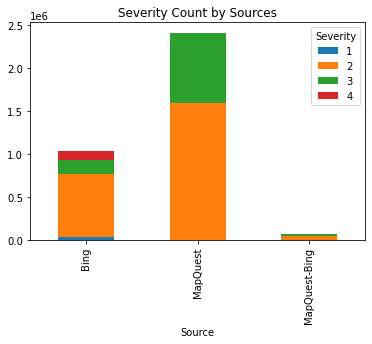

In [3]:
df_source = df.groupby(['Severity','Source']).size().reset_index().pivot(\
    columns='Severity', index='Source', values=0)
df_source.plot(kind='bar', stacked=True, title='Severity Count by Sources')

The stacked bar chart shows that two data providers reported totally different proportions of accidents of each level. *MapQuest* reported so rare accidents with severity level 4 which can not even be seen in the plot, whereas *Bing* reported almost the same number of level 4 accidents as level 2. Meanwhile, *MapQuest* reported much more level 3 accidents than *Bing* in terms of proportion. These differences may be due to the different kinds of accidents they tend to collect or the different definitions of severity level, or the combination of them. If the latter is the case, I don't think we can use the data from both of them at the same time. To check it out, we can examine the distribution of accidents with different severity levels across two main measures, **Impacted Distance** and **Duration**.


In [4]:
# fix datetime type
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

# calculate duration as the difference between end time and start time in minute
df['Duration'] = df.End_Time - df.Start_Time 
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
print("The overall mean duration is: ", (round(df['Duration'].mean(),3)), 'min')

The overall mean duration is:  115.404 min


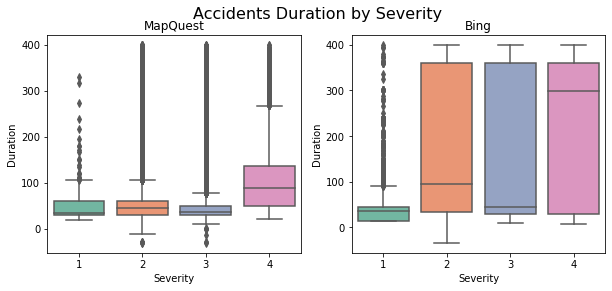

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="MapQuest") & (df['Duration']<400),], palette="Set2", ax=axs[0])
axs[0].set_title('MapQuest')
fig.suptitle('Accidents Duration by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="Bing") & (df['Duration']<400),], palette="Set2", ax=axs[1])
axs[1].set_title('Bing')
plt.show()

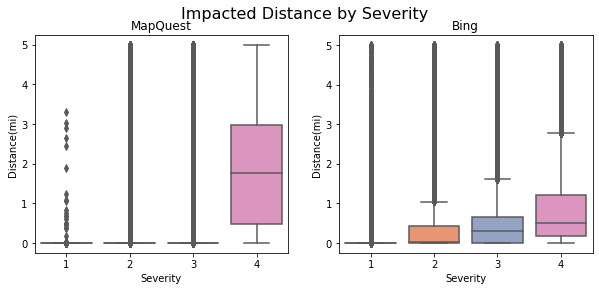

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Distance(mi)", 
            data=df.loc[(df['Source']=="MapQuest") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[0])
axs[0].set_title('MapQuest')
fig.suptitle('Impacted Distance by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Distance(mi)",
            data=df.loc[(df['Source']=="Bing") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[1])
axs[1].set_title('Bing')
plt.show()

Two differences are obvious in the above plots. The first is that the overall duration and impacted distance of accidents reported by *Bing* are much longer than those by *MapQuest*. Second, same severity level holds different meanings for *MapQuest* and *Bing*. *MapQuest* seems to have a clear and strict threshold for severity level 4, cases of which nevertheless only account for a tiny part of the whole dataset. *Bing*, on the other hand, doesn't seem to have a clear-cut threshold, especially regards duration, but the data is more balanced. 

It is hard to choose one and we definitely can't use both. I decided to select *MapQuest* because serious accidents are we really care about and the sparse data of such accidents is the reality we have to confront.

Finally, drop data reported from *Bing* and 'Source' column.

In [7]:
df = df.loc[df['Source']=="MapQuest",]
df = df.drop(['Source'], axis=1)

<a id="1.3"></a>    
## 1.3 Useless Features
Features 'ID' doesn't provide any useful information about accidents themselves. 'TMC', 'Distance(mi)', 'End_Time' (we have start time), 'Duration', 'End_Lat', and 'End_Lng'(we have start location) can be collected only after the accident has already happened and hence cannot be predictors for serious accident prediction. For 'Description', the POI features have already been extracted from it by dataset creators. Let's get rid of these features first.



In [8]:
df = df.drop(['ID','TMC','Description','Distance(mi)', 'End_Time', 'Duration', 
              'End_Lat', 'End_Lng'], axis=1)

Check out some categorical features.

In [9]:
cat_names = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in cat_names:
  print(i,df[i].unique().size)

Unique count of categorical features:
Side 3
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


Drop 'Country' and 'Turning_Loop' for they have only one class.

In [10]:
df = df.drop(['Country','Turning_Loop'], axis=1)

<a id="1.4"></a>
## 1.4 Clean Up Categorical Features
If we look at categorical features closely, we will find some chaos in 'Wind_Direction' and 'Weather_Condition'. It is necessary to clean them up first.

### Wind Direction

In [11]:
print("Wind Direction: ", df['Wind_Direction'].unique())

Wind Direction:  ['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


Simplify wind direction

In [12]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['CALM' 'SW' 'S' 'W' 'NW' 'N' 'VAR' 'SE' 'E' 'NE' nan]


### Weather Condition
Weather-related vehicle accidents kill more people annually than large-scale weather disasters(source: weather.com). According to Road Weather Management Program, most weather-related crashes happen on wet-pavement and during rainfall. Winter-condition and fog are another two main reasons for weather-related accidents. To extract these three weather conditions, we first look at what we have in 'Weather_Condition' Feature.


In [13]:
# show distinctive weather conditions 
weather ='!'.join(df['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drizzle', 'Dust', 'Dust Whirlwinds', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Smoke', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Hail', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Grains', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorm', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Showers', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 'Tornado', 'Volcanic Ash', 'Widespr

Create features for some common weather conditions and drop 'Weather_Condition' then.

In [14]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), 1, 0)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), 1, 0)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), 1, 0)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), 1, 0)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), 1, 0)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), 1, 0)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), 1, 0)

# Assign NA to created weather features where 'Weather_Condition' is null.
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
  df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']

df.loc[:,['Weather_Condition'] + weather]

df = df.drop(['Weather_Condition'], axis=1)

<a id="1.5"></a>
## 1.5 Fix Datetime Format

In [15]:
# average difference between weather time and start time
print("Mean difference between 'Start_Time' and 'Weather_Timestamp': ", 
(df.Weather_Timestamp - df.Start_Time).mean())

Mean difference between 'Start_Time' and 'Weather_Timestamp':  0 days 00:00:30.397947


Since the 'Weather_Timestamp' is almost as same as 'Start_Time', we can just keep 'Start_Time'. Then map 'Start_Time' to 'Year', 'Month', 'Weekday', 'Day' (in a year), 'Hour', and 'Minute' (in a day).

In [16]:
df = df.drop(["Weather_Timestamp"], axis=1)

df['Year'] = df['Start_Time'].dt.year

nmonth = df['Start_Time'].dt.month
df['Month'] = nmonth

df['Weekday']= df['Start_Time'].dt.weekday

days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday

df['Hour'] = df['Start_Time'].dt.hour

df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

df.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

,Start_Time,Year,Month,Weekday,Day,Hour,Minute
0,2016-02-08 05:46:00,2016,2,0,39,5,346.0
1,2016-02-08 06:07:59,2016,2,0,39,6,367.0
2,2016-02-08 06:49:27,2016,2,0,39,6,409.0
3,2016-02-08 07:23:34,2016,2,0,39,7,443.0
4,2016-02-08 07:39:07,2016,2,0,39,7,459.0


<a id="2"></a>
# 2 HANDLING MISSING DATA
<a id="2.1"></a>
## 2.1 Drop Features
As seen from below, many columns have missing values.

In [17]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
4,Number,59.879195
7,City,0.002071
10,Zipcode,0.012840
11,Timezone,0.085366
12,Airport_Code,0.170857
13,Temperature(F),1.634138
14,Wind_Chill(F),58.718072
15,Humidity(%),1.742119
16,Pressure(in),1.404009
17,Visibility(mi),1.969680


More than 60% percent of 'Number', 'Wind_Chill(F)', and 'Precipitation(in)' is missing. Drop na and value imputation wouldn't work for these features. 'Number' and 'Wind_Chill(F)' will be dropped because they are not highly related to severity according to previous research, whereas 'Precipitation(in)' could be a useful predictor and hence can be handled by separating feature.

Drop these features:

 1. 'Number'

 2. 'Wind_Chill(F)'


In [18]:
df = df.drop(['Number','Wind_Chill(F)'], axis=1)

<a id="2.2"></a>
## 2.2 Separate Featrue
Add a new feature for missing values in 'Precipitation(in)' and replace missing values with median.


In [19]:
df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:5,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.02,0
1,0.00,0
2,0.00,1
3,0.00,1
4,0.00,1
5,0.03,0


<a id="2.3"></a>
## 2.3 Drop NaN
The counts of missing values in some features are much smaller compared to the total sample. It is convenient to drop rows with missing values in these columns.

Drop NAs by these features:

1. 'City'
2. 'Zipcode'
3. 'Airport_Code'
4. 'Sunrise_Sunset'
5. 'Civil_Twilight'
6. 'Nautical_Twilight'
7. 'Astronomical_Twilight'

In [20]:
df = df.dropna(subset=['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

<a id="2.4"></a>
## 2.4 Value Imputation
Most of the rest columns only have small missing part that can be filled. (It is not absolutely necessary though, we can also just drop na)
### Continuous Weather Data
Continuous weather features with missing values:

1. Temperature(F)

2. Humidity(%)

3. Pressure(in)

4. Visibility(mi)

5. Wind_Speed(mph)

Before imputation, weather features will be grouped by location and time first, to which weather is naturally related. 'Airport_Code' is selected as location feature because the sources of weather data are airport-based weather stations. Then the data will be grouped by 'Start_Month' rather than 'Start_Hour' because using the former is computationally cheaper and remains less missing values. Finally, missing values will be replaced by median value of each group. 

In [21]:
# group data by 'Airport_Code' and 'Start_Month' then fill NAs with median value
Weather_data=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']
print("The number of remaining missing values: ")
for i in Weather_data:
  df[i] = df.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(x.median()))
  print( i + " : " + df[i].isnull().sum().astype(str))

The number of remaining missing values: 
Temperature(F) : 4899
Humidity(%) : 4924
Pressure(in) : 4865
Visibility(mi) : 11084
Wind_Speed(mph) : 11257


There still are some missing values but much less. Just dropna by these features for the sake of simplicity.

In [22]:
df = df.dropna(subset=Weather_data)

### Categorical Weather Features
For categorical weather features, majority rather than median will be used to replace missing values.

In [23]:
# group data by 'Airport_Code' and 'Start_Month' then fill NAs with majority value
from collections import Counter
weather_cat = ['Wind_Direction'] + weather
print("Count of missing values that will be dropped: ")
for i in weather_cat:
  df[i] = df.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x)
  print(i + " : " + df[i].isnull().sum().astype(str))

# drop na
df = df.dropna(subset=weather_cat)

Count of missing values that will be dropped: 
Wind_Direction : 7999
Clear : 10507
Cloud : 11276
Rain : 9490
Heavy_Rain : 8939
Snow : 8963
Heavy_Snow : 8932
Fog : 8955


<a id="3"></a>
# 3 EXPLORATION & ENGINEERING
<a id="3.1"></a>
## 3.1 Resampling
Based on the exploration we did in 1.2, the accidents with severity level 4 are much more serious than accidents of other levels, between which the division is far from clear-cut. Therefore, I decided to focus on level 4 accidents and regroup the levels of severity into level 4 versus other levels. 

In [24]:
df['Severity4'] = 0
df.loc[df['Severity'] == 4, 'Severity4'] = 1
df.Severity4.value_counts()

0    2377735
1       6615
Name: Severity4, dtype: int64

As seen from above, the data is so unbalanced that we can hardly do exploratory analysis. To address this issue, the combination of over- and under-sampling will be used since the dataset is large enough. level 4 will be randomly oversampled to 100000 and other levels will be randomly undersampled to 100000.

In [25]:
df = df.drop(['Severity'], axis = 1)
df_bl = pd.concat([df[df['Severity4']==1].sample(100000, replace = True),
                   df[df['Severity4']==0].sample(100000)], axis=0)
print('resampled data:', df_bl.Severity4.value_counts())

resampled data: 1    100000
0    100000
Name: Severity4, dtype: int64


Then we can do some exploratoty analysis on resampled data. 

<a id="3.2"></a>
## 3.2 Time Features
### Year

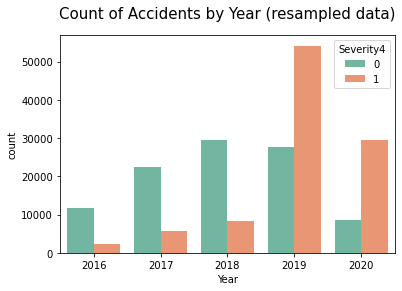

In [26]:
df_bl.Year = df_bl.Year.astype(str)
sns.countplot(x='Year', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.show()

There must be something wrong. It is impossible that the number of accidents with severity level 4 in 2019 is more than 5 times the number in 2018 while the number of other levels accidents is less. Let's back to raw data to have a look.

I created a heatmap of accidents with severity level 4 from 2016 to 2019, seeing how they actually distributed.

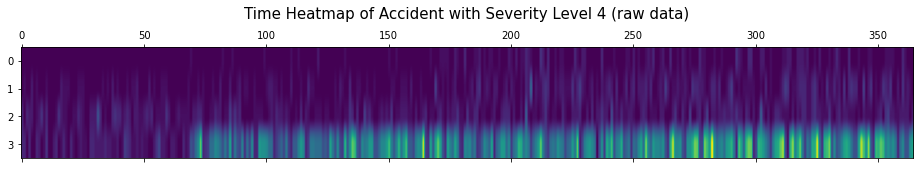

In [27]:
# create a dataframe used to plot heatmap
df_date = df.loc[:,['Start_Time','Severity4']]         # create a new dateframe only containing time and severity
df_date['date'] = df_date['Start_Time'].dt.normalize() # keep only the date part of start time
df_date = df_date.drop(['Start_Time'], axis = 1)
df_date = df_date.groupby('date').sum()                # sum the number of accidents with severity level 4 by date
df_date = df_date.reset_index().drop_duplicates()

# join the dataframe with full range of date from 2016 to 2019
full_date = pd.DataFrame(pd.date_range(start="2016-01-02",end="2019-12-31"))    
df_date = full_date.merge(df_date, how = 'left',left_on = 0, right_on = 'date')
df_date['date'] = df_date.iloc[:,0]
df_date = df_date.fillna(0)
df_date = df_date.iloc[:,1:].set_index('date')

# group by date
groups = df_date['Severity4'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values

# plot
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.title('Time Heatmap of Accident with Severity Level 4 (raw data)', y=1.2, fontsize=15)
plt.show()

The heatmap indicates that something changed after Feb 2019. Maybe it is the way that *MapQuest* defines severity or the way they collect data. Anyway, we have to narrow down our data again. Since the data after Feb 2019 is less imbalanced and the data in the future is more likely to look like this, dropping the data before Mar 2019 may be the best choice.

In [28]:
df = df.loc[(df['Year']==2019) & (df['Month']!=1) & (df['Month']!=2),:]
df = df.drop(['Year', 'Start_Time'], axis=1)
df['Severity4'].value_counts()

0    545560
1      3490
Name: Severity4, dtype: int64

Resample cases of both level 4 and other levels accidents to 40000 this time.

In [29]:
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), df[df['Severity4']==0].sample(40000)], axis=0)


### Month
It's quite interesting that the count of other levels accidents is mostly consistent from March to December, whereas the number of level 4 accidents rapidly increased from March to May and remained stable until September then increased again from October.   

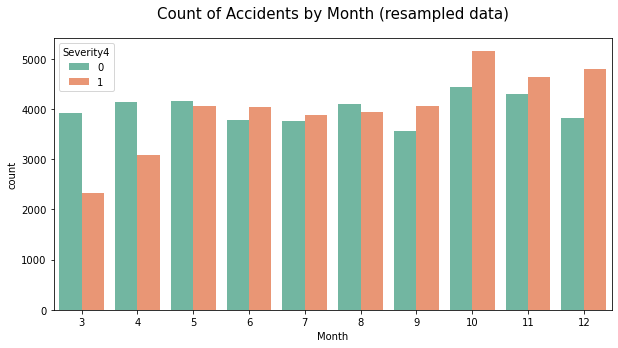

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Month (resampled data)', size=15, y=1.05)
plt.show()

### Weekday
The number of accidents was much less on weekends while the proportion of level 4 accidents was higher.

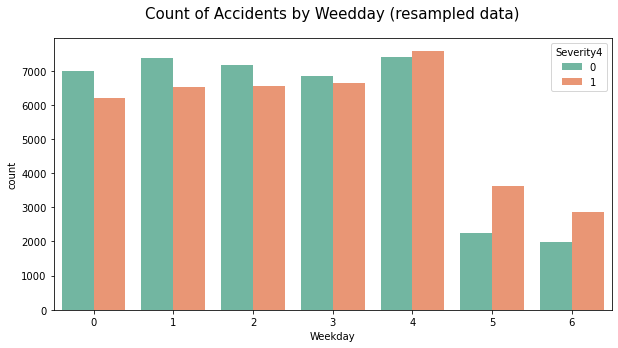

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Weedday (resampled data)', size=15, y=1.05)
plt.show()

### Period-of-Day
Accidents were less during the night but were more likely to be serious.

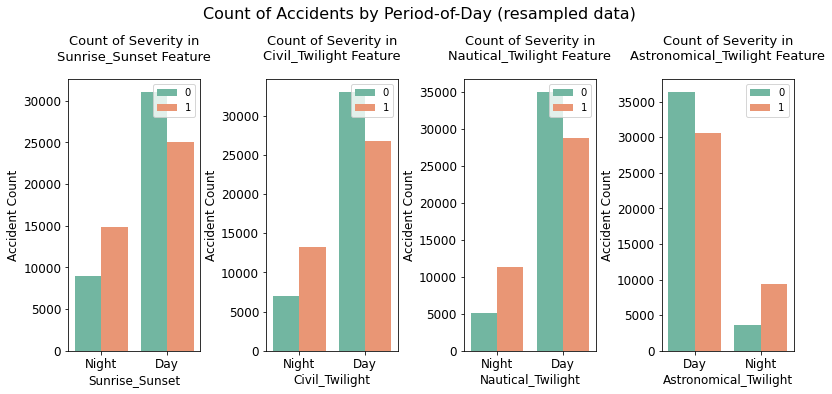

In [32]:
period_features = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(13, 5))

plt.subplots_adjust(wspace = 0.5)
for i, feature in enumerate(period_features, 1):    
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in\n{} Feature'.format(feature), size=13, y=1.05)
fig.suptitle('Count of Accidents by Period-of-Day (resampled data)',y=1.08, fontsize=16)
plt.show()

### Hour
Most accidents happened during the daytime, especially AM peak and PM peak. When it comes to night, accidents were far less but more likely to be serious.

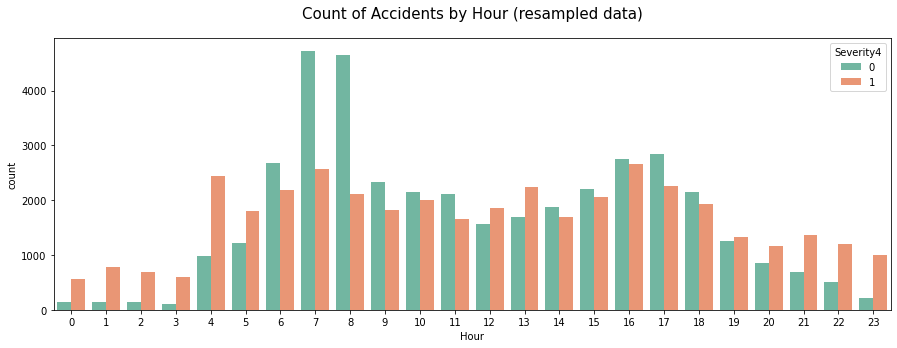

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Hour (resampled data)', size=15, y=1.05)
plt.show()

### Frequence Encoding (Minute)
As seen in the plot of 'Hour', 'Minute' may also be an important predictor. But directly using it would produce an overabundance of dummy variables. Therefore, the frequency of 'Minute' was utilized as labels, rather than 'Minute' itself. To normalize the distribution, the frequency was also transformed by log.

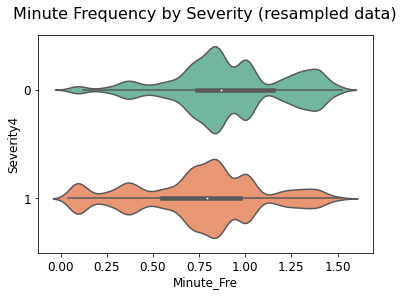

In [34]:
# frequence encoding and log-transform
df['Minute_Freq'] = df.groupby(['Minute'])['Minute'].transform('count')
df['Minute_Freq'] = df['Minute_Freq']/df.shape[0]*24*60
df['Minute_Freq'] = df['Minute_Freq'].apply(lambda x: np.log(x+1))

# resampling
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)

# plot
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
sns.violinplot(x='Minute_Freq', y="Severity4", data=df_bl, palette="Set2")    
plt.xlabel('Minute_Fre', size=12, labelpad=3)
plt.ylabel('Severity4', size=12, labelpad=3)    
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Minute Frequency by Severity (resampled data)', size=16, y=1.05)
plt.show()

The violin plot shows that the overall minute frequency of accidents with severity level 4 is less than other levels. In other words, an accident is more likely to be a serious one when accidents happen less frequently.

<a id="3.3"></a>
## 3.3 Address Features
### Timezone
Eastern time zone is the most dangeous one.

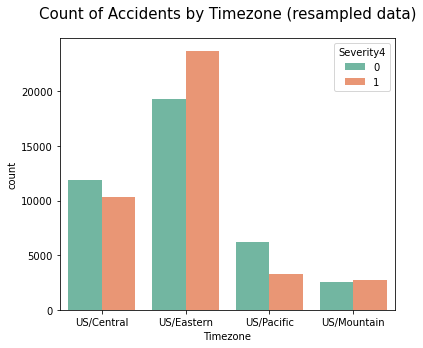

In [35]:
plt.figure(figsize=(6,5))
chart = sns.countplot(x='Timezone', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents by Timezone (resampled data)", size=15, y=1.05)
plt.show()

### State
Fl, CA, and TX are the top 3 states with the most accidents.

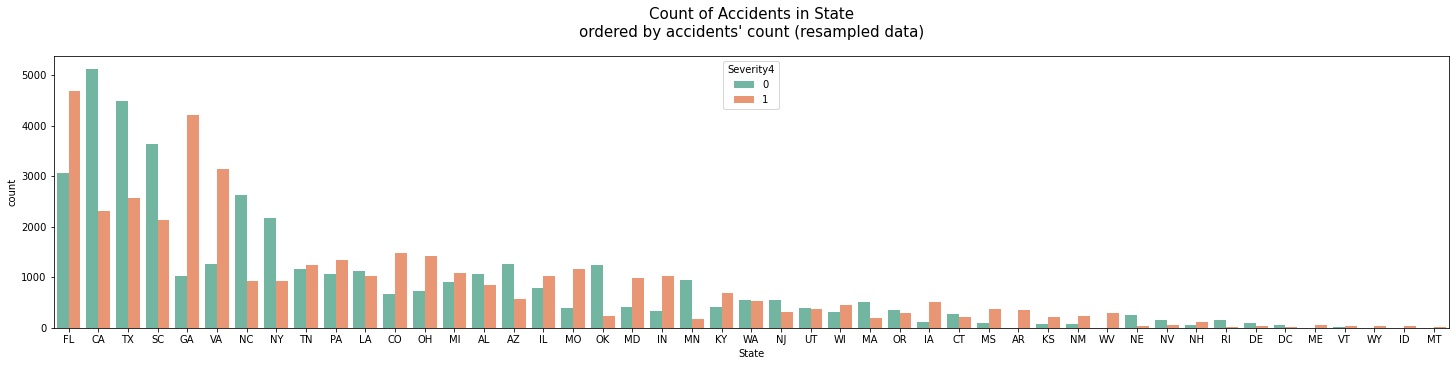

In [36]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity4', 
                      data=df_bl ,palette="Set2", order=df_bl['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by accidents' count (resampled data)", size=15, y=1.05)
plt.show()

It is a different story if we order the plot by the count of accidents with severity of level 4. FL is still the top one but the next two are GA and VA.

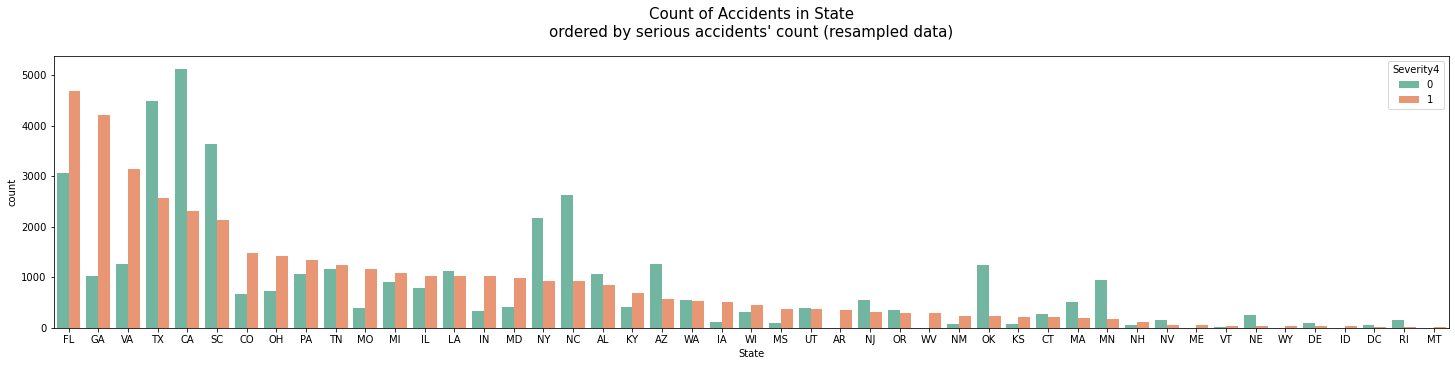

In [37]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity4', data=df_bl ,palette="Set2", order=df_bl[df_bl['Severity4']==1]['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by serious accidents' count (resampled data)", size=15, y=1.05)
plt.show()

### County
There are too many counties that we cannot visualize them as we did for states. But we do can incorporate census data for them.

Several basic variables, like total population, percent of commuters who drive, take transit or walk to work, and median household income, for all counties were downloaded from ACS 5-year estimates 2018. Then, counties' names were isolated. 

In [38]:
!pip install -q censusdata
import censusdata

# download data
county = censusdata.download('acs5', 2018, censusdata.censusgeo([('county', '*')]),
                                   ['DP05_0001E',  'DP03_0019PE','DP03_0021PE','DP03_0022PE','DP03_0062E'],
                                   tabletype='profile')
# rename columns
county.columns = ['Population_County','Drive_County','Transit_County','Walk_County','MedianHouseholdIncome_County']
county = county.reset_index()
# extract county name and convert them to lowercase
county['County_y'] = county['index'].apply(lambda x : x.name.split(' County')[0].split(',')[0]).str.lower()

In [39]:
county.head()

,index,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,County_y
0,"Washington County, Mississippi: Summary level:...",47086,86.4,0.0,1.3,30834,washington
1,"Perry County, Mississippi: Summary level: 050,...",12028,85.8,0.0,1.8,39007,perry
2,"Choctaw County, Mississippi: Summary level: 05...",8321,85.6,0.3,1.1,37203,choctaw
3,"Itawamba County, Mississippi: Summary level: 0...",23480,82.4,0.2,0.7,40510,itawamba
4,"Carroll County, Mississippi: Summary level: 05...",10129,90.0,0.0,1.4,43060,carroll


Counties' names turned out to be very tricky. Converting all of them into lowercase is not enough. Some counties name in USA-accidents omit "city" or "parish", and hence can't be matched with names in census data. We need to manually put them back and rejoin them.

In [40]:
# convert all county name to lowercase 
df['County'] = df['County'].str.lower()

# left join df with census data
df = df.merge(county, left_on = 'County', right_on='County_y',how = 'left').drop('County_y', axis = 1)
join_var = county.columns.to_list()[:-1]

# check how many miss match we got
print('Count of missing values before: ', df[join_var].isnull().sum())

# add "city" and match again
df_city = df[df['Walk_County'].isnull()].drop(join_var, axis=1)
df_city['County_city'] = df_city['County'].apply(lambda x : x + ' city')
df_city = df_city.merge(county,left_on= 'County_city',right_on = 'County_y', how = 'left').drop(['County_city','County_y'], axis=1)
df = pd.concat((df[df['Walk_County'].isnull()==False], df_city), axis=0)

# add "parish" and match again
df_parish = df[df['Walk_County'].isnull()].drop(join_var, axis=1)
df_parish['County_parish'] = df_parish['County'].apply(lambda x : x + ' parish')
df_parish = df_parish.merge(county,left_on= 'County_parish',right_on = 'County_y', how = 'left').drop(['County_parish','County_y'], axis=1)
df = pd.concat((df[df['Walk_County'].isnull()==False], df_parish), axis=0)
print('Count of missing values after: ', df[join_var].isnull().sum())



Count of missing values before:  index                           17553
Population_County               17553
Drive_County                    17553
Transit_County                  17553
Walk_County                     17553
MedianHouseholdIncome_County    17553
dtype: int64
Count of missing values after:  index                           5134
Population_County               5134
Drive_County                    5134
Transit_County                  5134
Walk_County                     5134
MedianHouseholdIncome_County    5134
dtype: int64


Drop na and use Logit transformation on some variables having extremly skewed distribution.

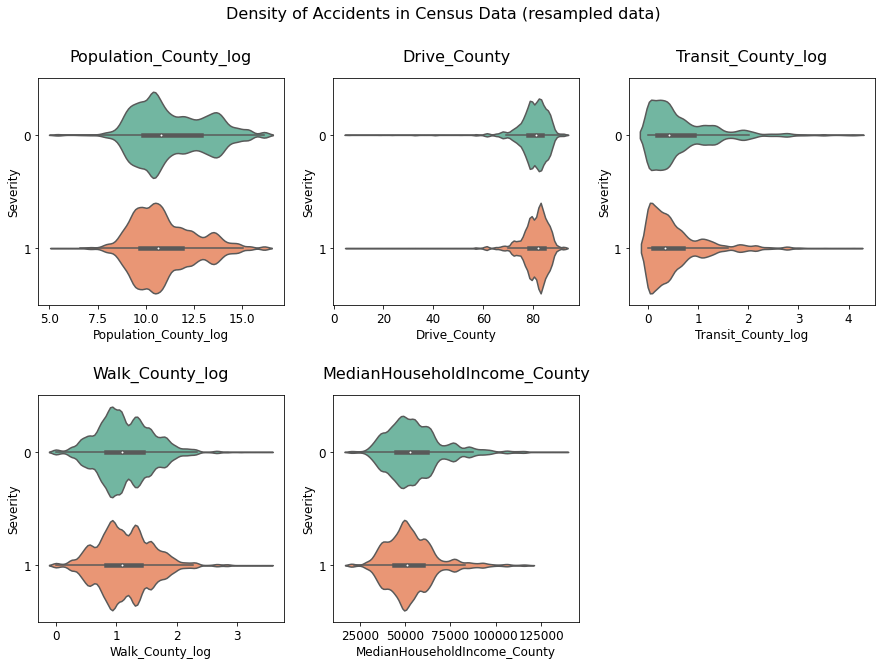

In [41]:
# drop na
df = df.drop('index', axis = 1).dropna()

# log-transform
for i in ['Population_County','Transit_County','Walk_County']:
    df[i + '_log'] = df[i].apply(lambda x: np.log(x+1))
df = df.drop(['Population_County','Transit_County','Walk_County'], axis = 1)

# resample again
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)
# plot
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
census_features = ['Population_County_log','Drive_County','Transit_County_log','Walk_County_log','MedianHouseholdIncome_County']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(census_features, 1):    
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{}'.format(feature), size=16, y=1.05)
fig.suptitle('Density of Accidents in Census Data (resampled data)', fontsize=16)
plt.show()

Percent of people taking transit to commute seems to related to severity. Level 4 accidents happened more frequently in those counties with a lower usage rate of transit.

### Street
There are more and more studies found that higher speed limits were associated with an increased likelihood of crashes and deaths. (https://www.cga.ct.gov/2013/rpt/2013-R-0074.htm) And speed limits are highly related to street type. Street type hence can be a good predictor of serious accidents. There is no feature about street type in the original dataset though, we can extract it from the street name. 

The top 40 most common words in street names were selected. This list contains not only street types but also some common words widely used in street names.

In [42]:
# create a list of top 40 most common words in street name
st_type =' '.join(df['Street'].unique().tolist()) # flat the array of street name
st_type = re.split(" |-", st_type) # split the long string by space and hyphen
st_type = [x[0] for x in Counter(st_type).most_common(40)] # select the 40 most common words
print('the 40 most common words')
print(*st_type, sep = ", ") 



the 40 most common words
Rd, St, Dr, Ave, N, S, E, W, Blvd, Ln, Highway, Pkwy, Hwy, Way, NE, SW, NW, Ct, State, Old, Pl, SE, Road, US, Creek, Cir, Park, Hill, Route, Lake, County, I, Trl, Valley, Ridge, Mill, Pike, Fwy, River, Oak


Remove some irrelevant words and add spaces and hyphen back

In [43]:
# Remove some irrelevant words and add spaces and hyphen back
st_type= [' Rd', ' St', ' Dr', ' Ave', ' Blvd', ' Ln', ' Highway', ' Pkwy', ' Hwy', 
          ' Way', ' Ct', 'Pl', ' Road', 'US-', 'Creek', ' Cir', 'Hill', 'Route', 
          'I-', 'Trl', 'Valley', 'Ridge', 'Pike', ' Fwy', 'River']
print(*st_type, sep = ", ")  

 Rd,  St,  Dr,  Ave,  Blvd,  Ln,  Highway,  Pkwy,  Hwy,  Way,  Ct, Pl,  Road, US-, Creek,  Cir, Hill, Route, I-, Trl, Valley, Ridge, Pike,  Fwy, River


Create a dummy variable for each word in the list and plot the correlation between these key words and severity. 

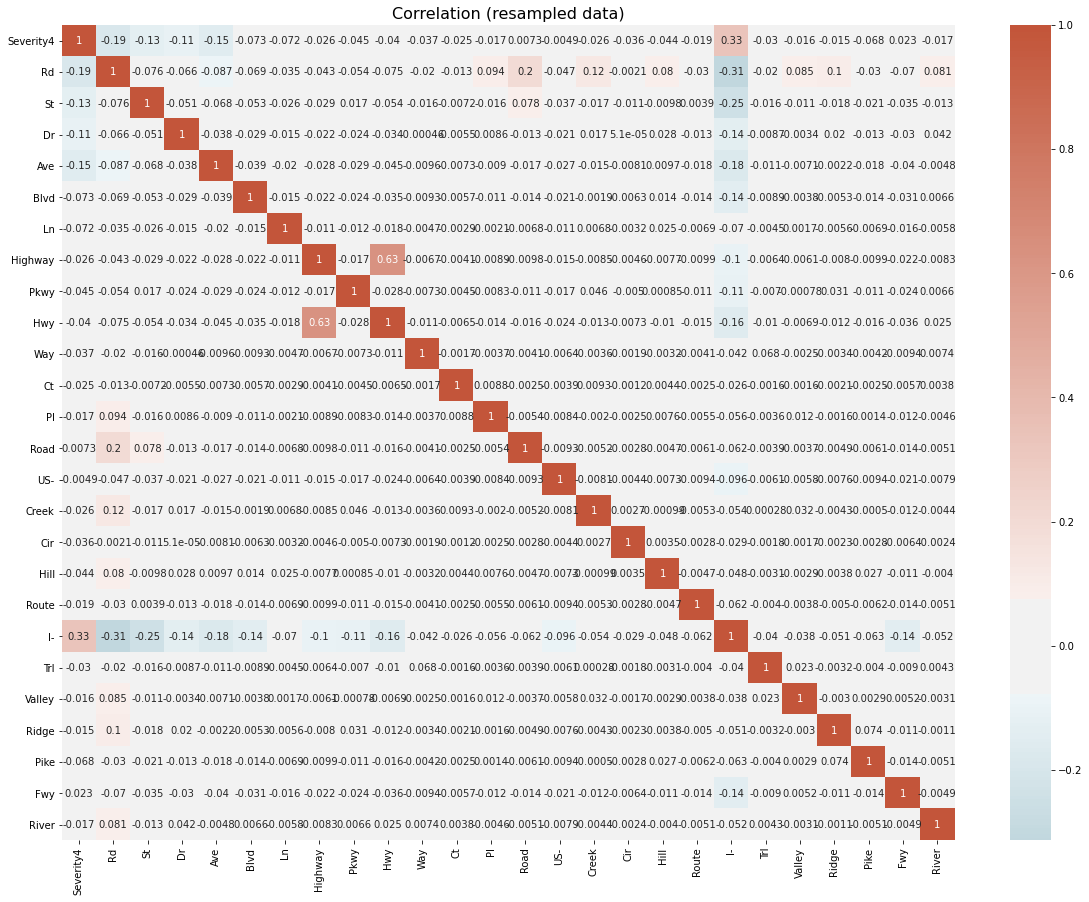

In [44]:
# for each word create a boolean column
for i in st_type:
  df[i.strip()] = np.where(df['Street'].str.contains(i, case=True, na = False), 1, 0)
df.loc[df['Road']==1,'Rd'] = 1
df.loc[df['Highway']==1,'Hwy'] = 1

# resample again
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)

# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
street_corr  = df_bl.loc[:,['Severity4']+[x.strip() for x in st_type]].corr()
plt.figure(figsize=(20,15))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(street_corr, annot=True, cmap=cmap, center=0).set_title("Correlation (resampled data)", fontsize=16)
plt.show()

Interstate Highway turns out to be the most dangerous street. Other roads like basic road, street, drive, and avenue are relatively safe. Let's just keep these five features.


In [45]:
drop_list = street_corr.index[street_corr['Severity4'].abs()<0.1].to_list()
df = df.drop(drop_list, axis=1)

# resample again
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)

### Side
Right side of the line is much more dangerous than left side.

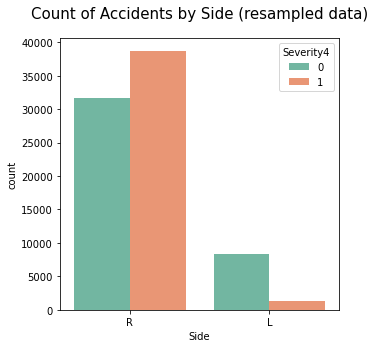

In [46]:
plt.figure(figsize=(5,5))
chart = sns.countplot(x='Side', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents by Side (resampled data)", size=15, y=1.05)
plt.show()

### Latitude and Longitude

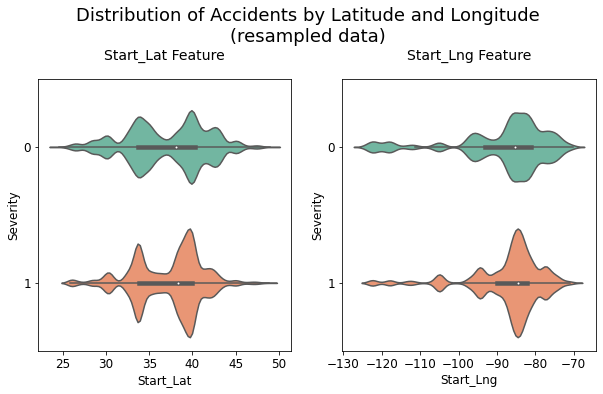

In [47]:
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
num_features = ['Start_Lat', 'Start_Lng']
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(1, 2, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Distribution of Accidents by Latitude and Longitude\n(resampled data)', fontsize=18,y=1.08)
plt.show()

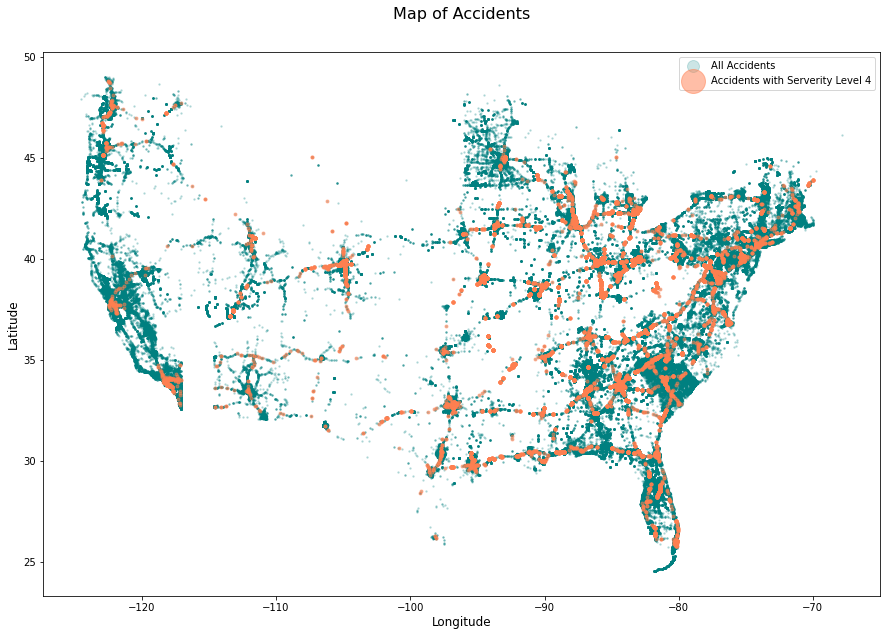

In [48]:
df_4 = df[df['Severity4']==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

### Frequency Encoding
Similar to 'Minute', some location features like 'City' and 'Zipcode' that have too many unique values can be labeled by their frequency. 
Frequency encoding and log-transform:
1. 'Street'
2. 'City'
3. 'County'
4. 'Zipcode'
5. 'Airport_Code'

In [49]:
fre_list = ['Street', 'City', 'County', 'Zipcode', 'Airport_Code']
for i in fre_list:
  newname = i + '_Freq'
  df[newname] = df.groupby([i])[i].transform('count')
  df[newname] = df[newname]/df.shape[0]*df[i].unique().size
  df[newname] = df[newname].apply(lambda x: np.log(x+1))

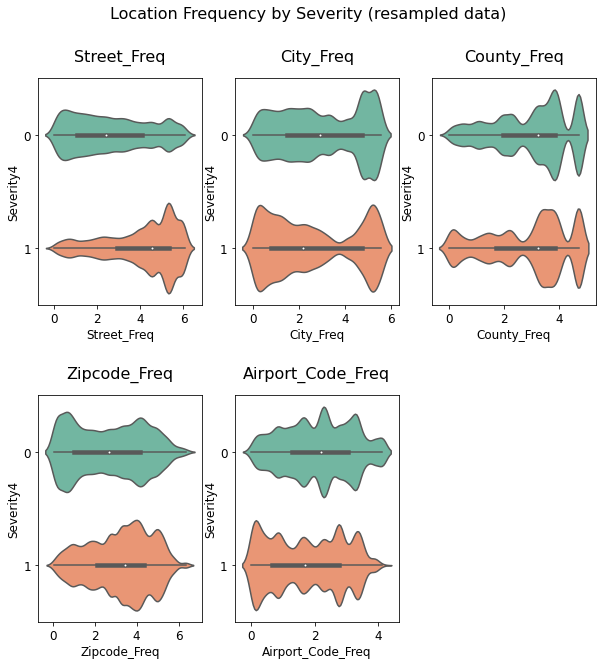

In [50]:
# resample again
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
fig.suptitle('Location Frequency by Severity (resampled data)', fontsize=16)
for i, feature in enumerate(fre_list, 1): 
    feature = feature + '_Freq'   
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity4', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{}'.format(feature), size=16, y=1.05)
plt.show()

Two opposite patterns can be identified in these plots. For 'Street' and 'Zipcode', higher frequency means higher likelihood of being a serious accident. In contrast with these smaller regions, for 'City' and 'Airport_Code' instead, higher frequency means less likelihood of being a serious accident.
Get rid of features we don't need anymore.

In [51]:
df = df.drop(fre_list, axis  = 1)

<a id="3.4"></a>
## 3.4 Weather Features
### Continuous Weather Features
Normalize features with extreamly skewed distribution first.

In [52]:
df['Pressure_bc']= boxcox(df['Pressure(in)'].apply(lambda x: x+1),lmbda=6)
df['Visibility_bc']= boxcox(df['Visibility(mi)'].apply(lambda x: x+1),lmbda = 0.1)
df['Wind_Speed_bc']= boxcox(df['Wind_Speed(mph)'].apply(lambda x: x+1),lmbda=-0.2)
df = df.drop(['Pressure(in)','Visibility(mi)','Wind_Speed(mph)'], axis=1)

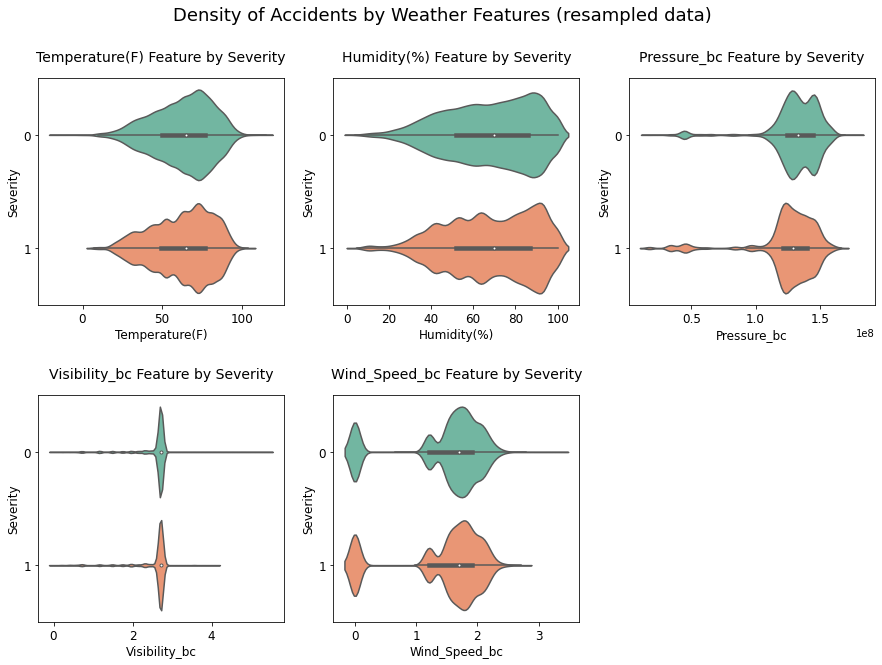

In [53]:
# resample again
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
num_features = ['Temperature(F)', 'Humidity(%)', 'Pressure_bc', 'Visibility_bc', 'Wind_Speed_bc']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature by Severity'.format(feature), size=14, y=1.05)
fig.suptitle('Density of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

### Weather Conditions

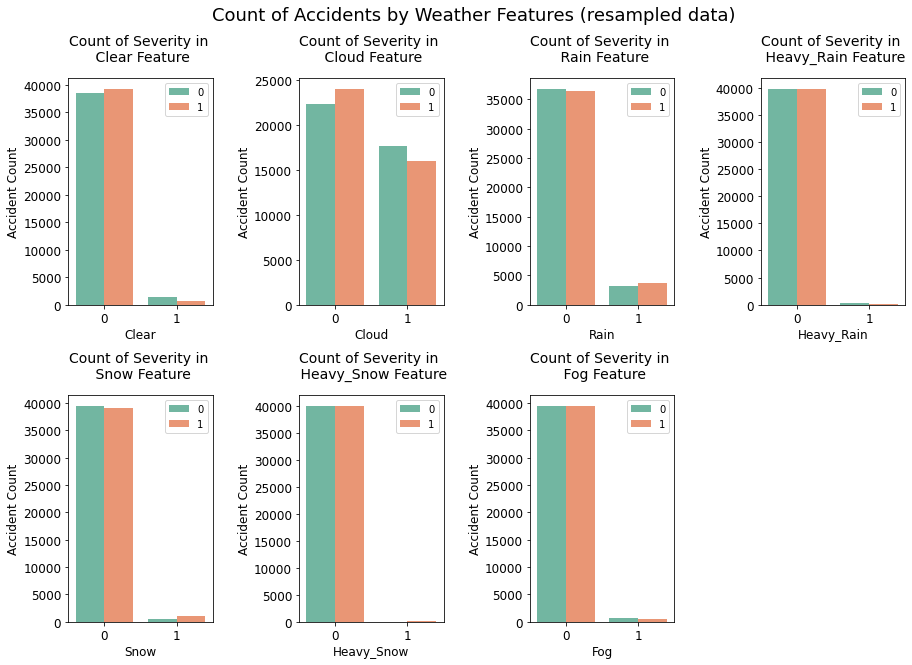

In [54]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.6)
for i, feature in enumerate(weather, 1):    
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in \n {} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

As seen from above, accidents are little more likely to be serious during rain or snow while less likely on a cloudy day. 

### Wind Direction

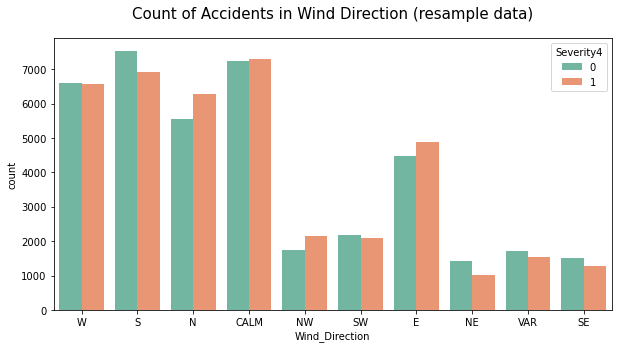

In [55]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Wind_Direction', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents in Wind Direction (resample data)", size=15, y=1.05)
plt.show()

<a id="3.5"></a>
## 3.5 POI Features

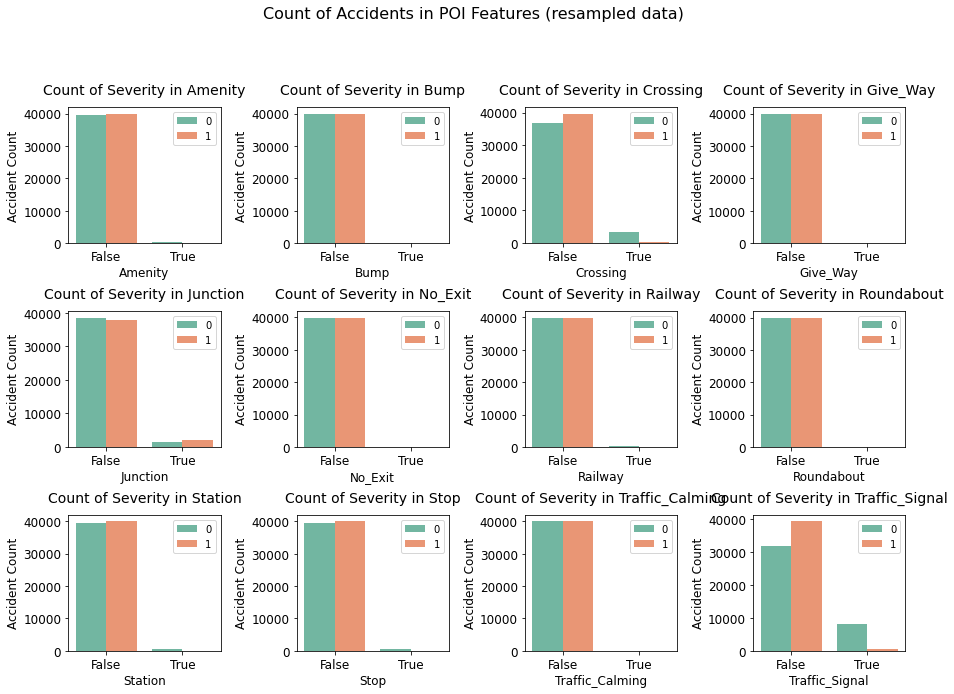

In [56]:
POI_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in POI Features (resampled data)',y=1.02, fontsize=16)
plt.show()

Accidents near traffic signal and crossing are much less likely to be serious accidents while little more likely to be serious if they are near the junction. Maybe it is because people usually slow down in front of crossing and traffic signal but junction and severity are highly related to speed. Other POI features are so unbalanced that it is hard to tell their relation with severity from plots.

Drop some features:

1. 'Bump'
2. 'Give_Way'
3. 'No_Exit'
4. 'Roundabout'
5. 'Traffic_Calming'

In [57]:
df= df.drop(['Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming'], axis=1)

<a id="3.6"></a>
## 3.6 Correlation
Features are not highly correlated with each other. The top 3 highest correlations between severity and features are -0.17 (traffic_signal), 0.15 (Start_Lng), 0.12 (Start_Lat).

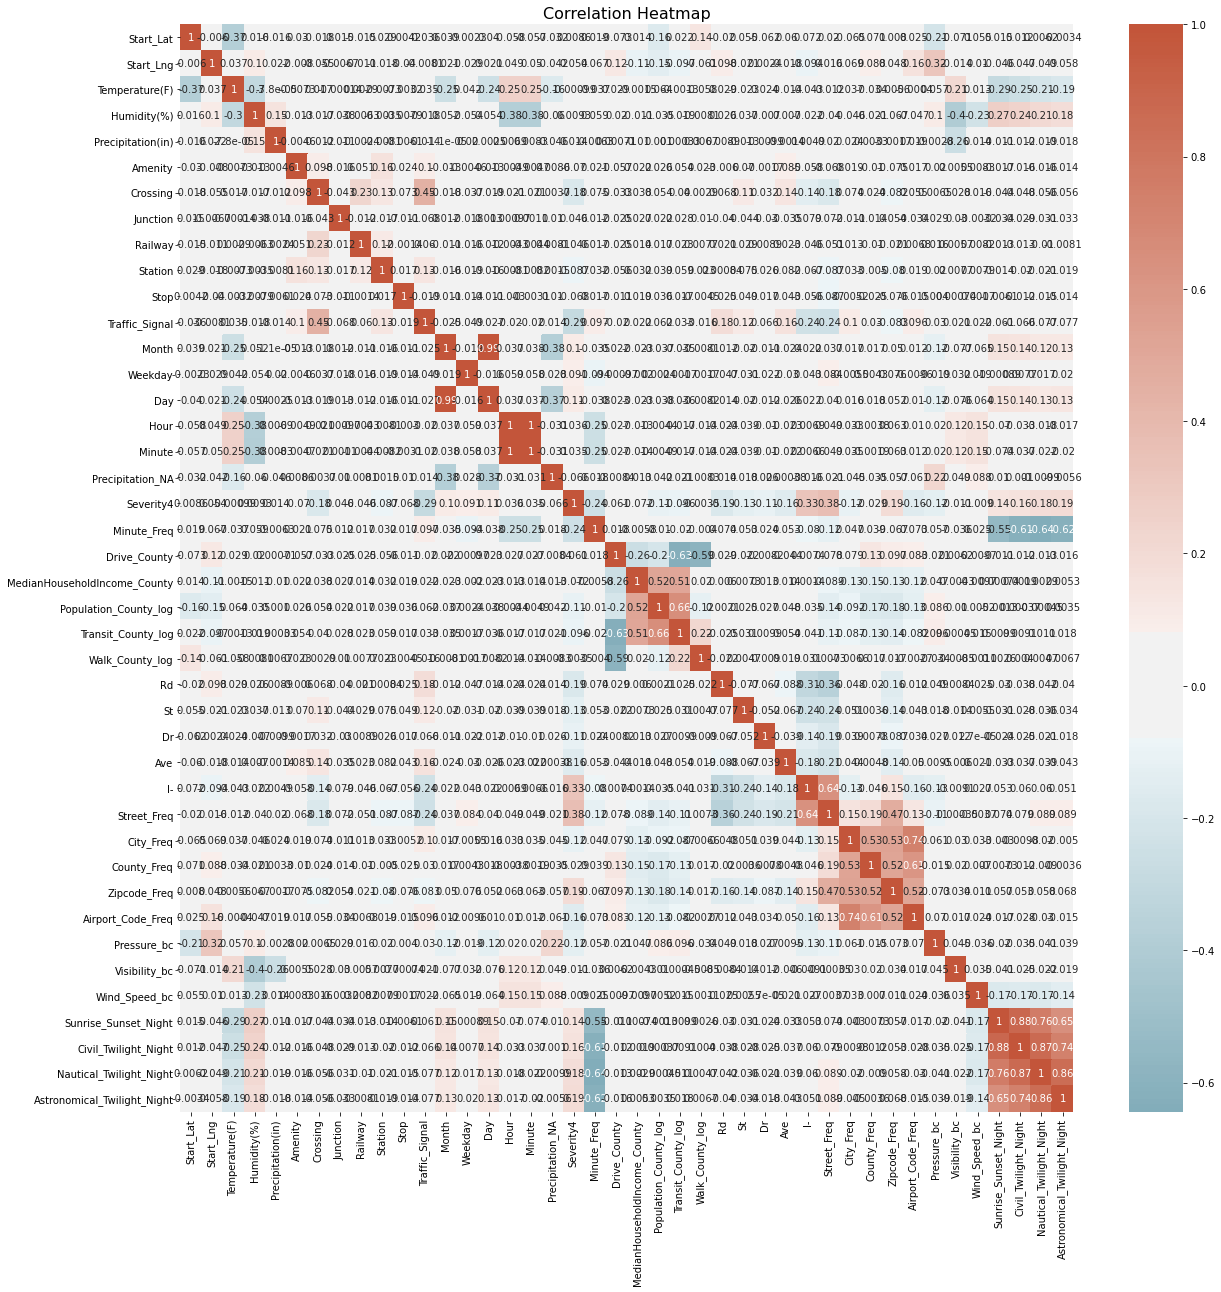

In [58]:
# one-hot encoding
df[period_features] = df[period_features].astype('category')
df = pd.get_dummies(df, columns=period_features, drop_first=True)

# resample again
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)

# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_bl.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=16)
plt.show()

The above figure shows strong positive correlations between 'Severity4' (level 4 severity) with 'I-' (Interstate highway) as well as 'Street_Freq', and strong negative correlation between it with 'Traffic_signal' and 'Minute_Freq'.

We can also identify several highly colinear features, such as 'Day'-'Month', 'Minute'-'Hour', 'Transit_County_log'-'Population_County_log', 'Airport_Code_Freq'-'City_Freq', and four period-of-day features. Let's drop some of them.   

drop features:
1. 'Day'
2. 'Minute'
3. 'Population_County_log'
4. 'City_Freq'
5. 'Civil_Twilight_Night'
6. 'Nautical_Twilight_Night'

In [59]:
df = df.drop(['Day','Minute','Population_County_log','City_Freq','Civil_Twilight_Night',
              'Nautical_Twilight_Night'], axis=1)

<a id="3.7"></a>
## 3.7 One-hot Encoding 
One-hot encode categorical features.

In [60]:
df = df.replace([True, False], [1,0])

cat = ['Side','State','Timezone','Wind_Direction', 'Weekday', 'Month', 'Hour']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)

df.head()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Precipitation(in),Amenity,Crossing,Junction,Railway,Station,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,40.884850,-95.800362,31.0,85.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,40.884850,-95.800362,31.0,85.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,40.884850,-95.800362,31.0,85.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,40.884850,-95.800362,31.0,85.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,40.889641,-95.798630,31.0,85.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


<a id="4"></a>
# 4 Model
<a id="4.1"></a>
## 4.1 Train Test Split
Resample data and split it into X and y.

Standardize features based on unit variance.

Split data into X_train, X_test, y_train, and y_test. The size of training data is about 64000 and the test is about 16000.

In [61]:
# resample again
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)
# split X, y
X = df_bl.drop('Severity4', axis=1)
y= df_bl['Severity4']

# Standardizing the features based on unit variance
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

# split train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.20, random_state=42)

<a id="4.2"></a>
## 4.2 Logistic Regression
Logistic regression was emploied as a baseline to perform binary classification task.

In [62]:
# Logistic regression with default setting.
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000,random_state=42)
clf.fit(X_train, y_train)

accuracy_train = clf.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (accuracy_train*100))
accuracy_test = clf.score(X_test,y_test)
print("Test Accuracy: %.1f%%"% (accuracy_test*100))

Train Accuracy: 77.3%
Test Accuracy: 77.2%


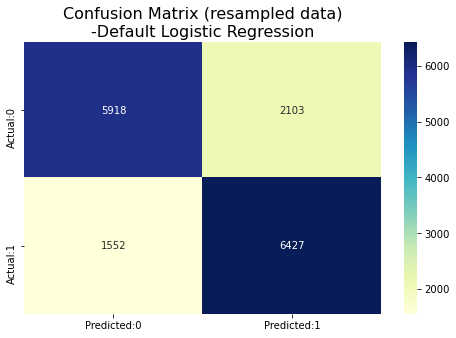

In [63]:
from sklearn.metrics import multilabel_confusion_matrix

y_pred = clf.predict(X_test)

confmat = multilabel_confusion_matrix(y_true=y_test, y_pred=y_pred,
                           labels=[1])

conf_matrix = pd.DataFrame(data=confmat[0],
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix (resampled data)\n-Default Logistic Regression", fontsize=16)
plt.show()

The grid search was performed over choices of 'penalty': {'none','l2'}, 'C': {0.001,.009,0.01,.09,1,5,10,25}, 'maximum iterations': {1000, 10000, 100000}

In [64]:
#Grid Search
from sklearn.model_selection import GridSearchCV
LR_grid = {
           'penalty':            ['none','l2'],
           'C':                  [0.001,.009,0.01,.09,1,5,10,25],
           'max_iter': [1000, 10000, 100000]
           }
CV_LR = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid = LR_grid,scoring = 'accuracy',cv=5)
CV_LR.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalt

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'max_iter': [1000, 10000, 100000],
                         'penalty': ['none', 'l2']},
             scoring='accuracy')

In [65]:
print('Best Parameters: ', CV_LR.best_params_)

Best Parameters:  {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}


In [66]:
%%time
from sklearn.metrics import confusion_matrix, accuracy_score
CV_LR_clf = LogisticRegression(C=0.09, max_iter=1000, penalty='l2')
CV_LR_clf.fit(X_train, y_train)
accuracy_train = CV_LR_clf.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (accuracy_train*100))
accuracy_test = CV_LR.score(X_test,y_test)
print("Test Accuracy: %.1f%%"% (accuracy_test*100))

Train Accuracy: 77.3%
Test Accuracy: 77.1%
Wall time: 1.3 s


Even with the best parameter setting, logistic regression yielded very poor results for both training data and test data.

<a id="4.3"></a>
## 4.3 Decision Tree
Then, decision tree classifier was employied. The grid search was performed over choices of 'min_samples_split': {5,10, 20, 30, 40}, 'max_features': {None, 'log2', 'sqrt'}

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
DT_grid = { 'min_samples_split': [5,10, 20, 30, 40], 
          'max_features': [None, 'log2', 'sqrt']}
CV_DT = GridSearchCV(DecisionTreeClassifier(random_state=42), DT_grid, verbose=1, cv=3)
CV_DT.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   34.4s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_features': [None, 'log2', 'sqrt'],
                         'min_samples_split': [5, 10, 20, 30, 40]},
             verbose=1)

In [68]:
print('Best Parameters: ', CV_DT.best_params_)

Best Parameters:  {'max_features': None, 'min_samples_split': 5}


In [69]:
%%time
from sklearn import tree
# Training step, on X_train with y_train
tree_clf = tree.DecisionTreeClassifier(min_samples_split = 5)
tree_clf = tree_clf.fit(X_train,y_train)

tree_accuracy_train = tree_clf.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (tree_accuracy_train*100))
tree_accuracy_test = tree_clf.score(X_test,y_test)
print("Test Accuracy: %.1f%%"% (tree_accuracy_test*100))

Train Accuracy: 99.7%
Test Accuracy: 96.3%
Wall time: 3.12 s


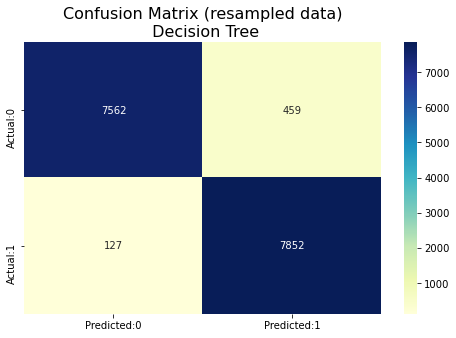

In [70]:
prediction = tree_clf.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=prediction)

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix (resampled data)\n Decision Tree", fontsize=16)
plt.show()

By using decision tree classifier, the training accuracy improved to 99.8% and test accuracy to 96.0%. The result is almost perfect.

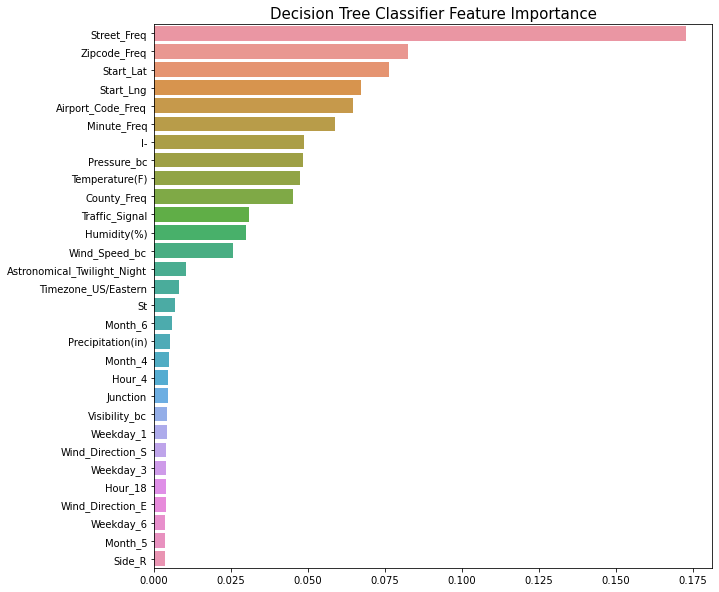

In [71]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], 
                           index=df.drop('Severity4',axis=1).columns)

importances.iloc[:,0] = tree_clf.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Decision Tree Classifier Feature Importance', size=15)

plt.show()

The feature importance plot shows that high-resolution spatio-temporal patterns of accidents are the most useful features to predict severity. Among them, *street frequency* is far more important than any other feature. In addition to these spatio-temporal features, weather features like *pressure*, *temperature*, *humidity*, and *wind speed* are also very important. Some other features like *interstate highway*('I-'), *traffic signal* are important as well.

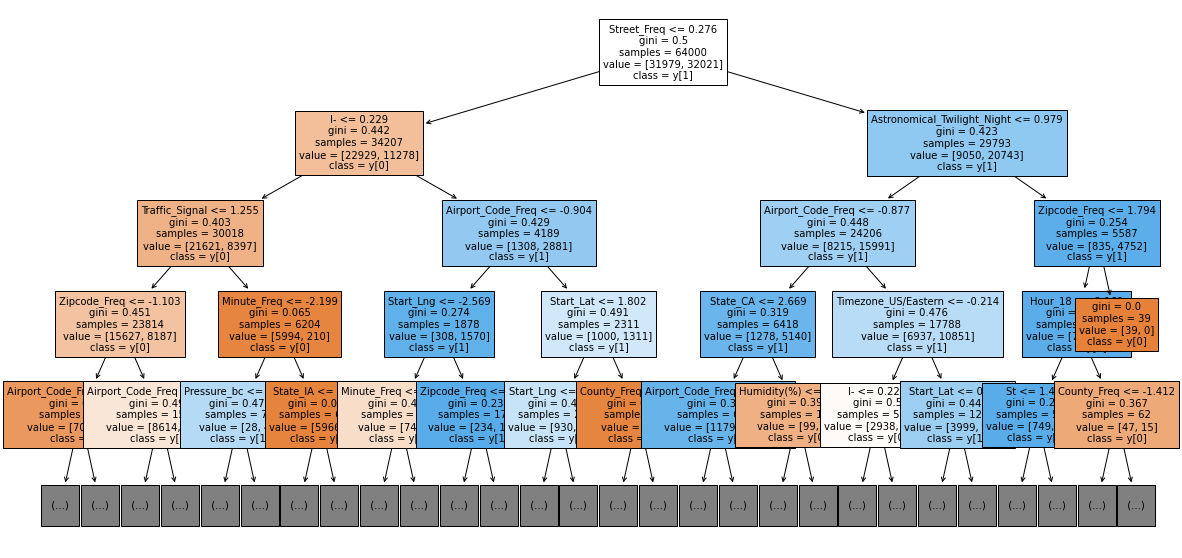

In [72]:
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(tree_clf, max_depth=4, fontsize=10,
               feature_names=df.drop('Severity4',axis =1).columns.to_list(),
               class_names = True, filled=True)
plt.show()

<a id="5"></a>
# 5 Future Work

1. Random Forest can be applied to check how well the model is trained.
2. Incorporate this model in a real-time accident risk prediction model or develop a new real-time severe accident risk prediction on grid cells.
3. Detailed relations between some key factors and accident severity can be further studied.
4. Policy implications of this project can be explored.  
